In [1]:
!pip install -q lifelines

QQplotやAICを用いたモデル選択
https://lifelines.readthedocs.io/en/latest/Examples.html の一部で必要そうな部分だけぱぱっとやる

In [2]:
import numpy as np
import pandas as pd
# visualize
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%config InlineBackend.figure_formats = {'png', 'retina'}
from lifelines import WeibullFitter, LogNormalFitter, LogLogisticFitter, ExponentialFitter

### qq plot
QQplotとは[■](https://ja.wikipedia.org/wiki/Q-Q%E3%83%97%E3%83%AD%E3%83%83%E3%83%88)
こっちのほうがわかりやすいかも [■](https://mathwords.net/qqplot)

つまりTの分布と仮定したTの分布が一致しているかが視覚的にわかる(分布が一致していれば直線状に並ぶ)

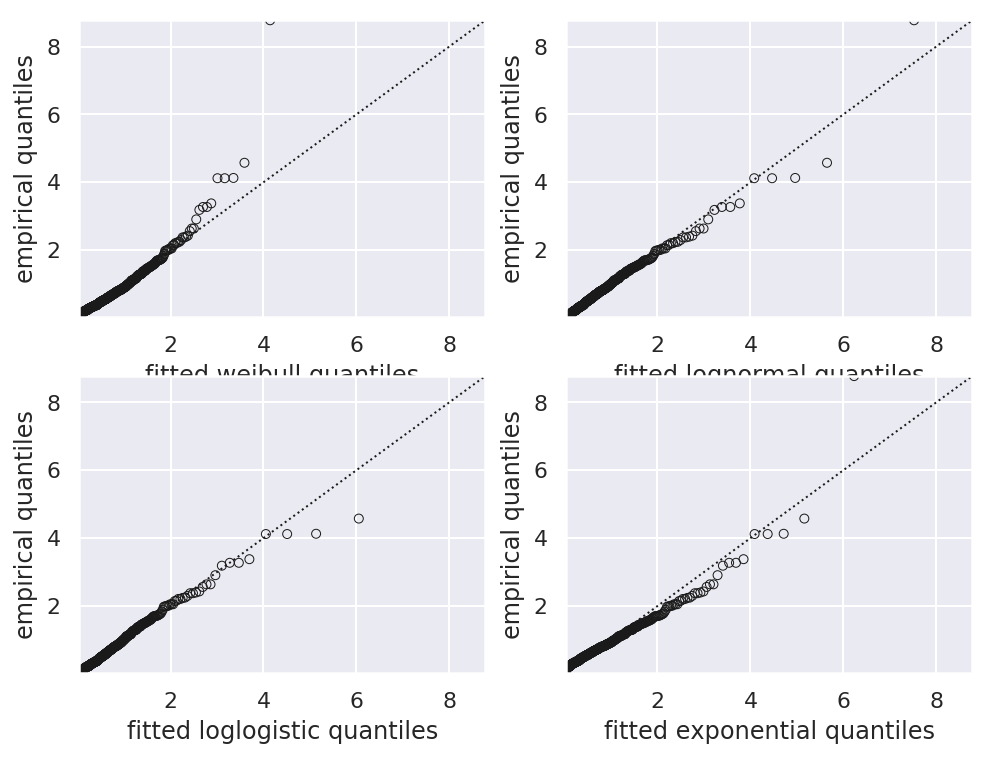

In [3]:
from lifelines.plotting import qq_plot

# generate some fake log-normal data
N = 1000
T_actual = np.exp(np.random.randn(N))
C = np.exp(np.random.randn(N))
E = T_actual < C
T = np.minimum(T_actual, C)

fig, axes = plt.subplots(2, 2, figsize=(8, 6))
axes = axes.reshape(4,)

for i, model in enumerate([WeibullFitter(), LogNormalFitter(), LogLogisticFitter(), ExponentialFitter()]):
    model.fit(T, E)
    qq_plot(model, ax=axes[i])

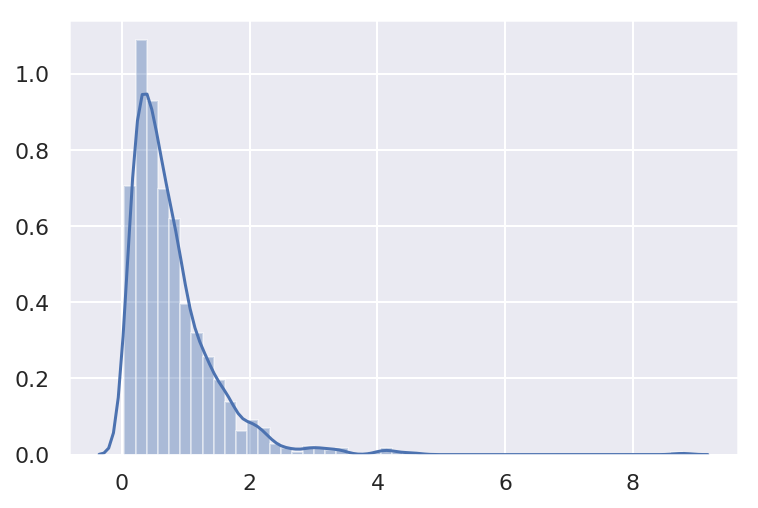

In [4]:
sns.distplot(T)
# Tの分布を直接見るよりも分位点で見たほうがロバストわかりやすい

### AICでモデル選択

<lifelines.SplineFitter:"Spline_estimate", fitted with 686 total observations, 387 right-censored observations>


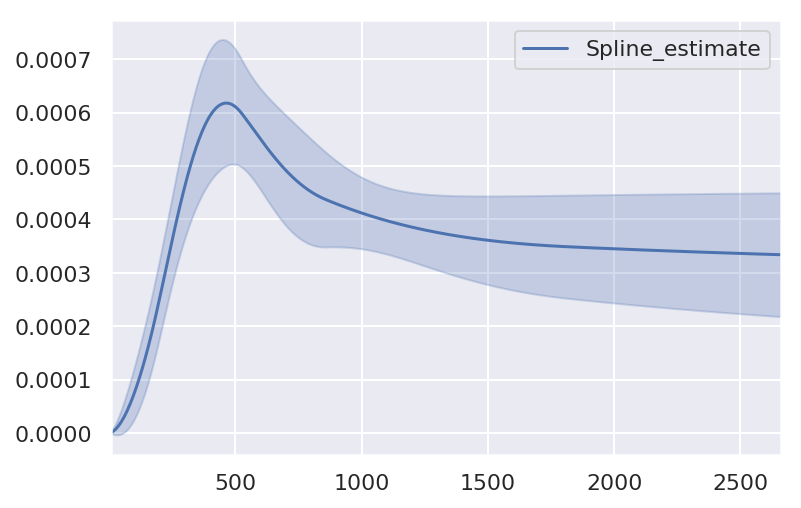

In [5]:
from lifelines.utils import find_best_parametric_model
from lifelines.datasets import load_lymph_node

T = load_lymph_node()['rectime']
E = load_lymph_node()['censrec']

best_model, best_aic_ = find_best_parametric_model(T, E) #これだけで最善のモデルが見つかる(lifelineに実装されている中で)

print(best_model)
# <lifelines.SplineFitter:"Spline_estimate", fitted with 686 total observations, 387 right-censored observations>

best_model.plot_hazard() #もう見つかった